Implentando uma rede neural para classificar imagens de dígitos escritos a mão, nos valores 0-9, utilizando a base de dados MNIST do tensorflow.examples

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [ ]:
mnist = input_data.read_data_sets('mnists/', one_hot = True)

In [7]:
x_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
x_teste = mnist.test.images
y_teste = mnist.test.labels

Text(0.5, 1.0, 'Classe: 7')

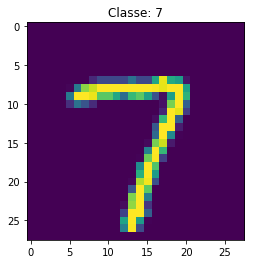

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_treinamento[100].reshape((28,28)))
plt.title('Classe: ' + str(np.argmax(y_treinamento[100])))

In [19]:
x_batch, y_batch = mnist.train.next_batch(64)

Definindo o número de neurônios de cada uma das camadas da rede.

In [20]:
neuronios_entrada = x_treinamento.shape[1]
neuronios_entrada

784

In [21]:
neuronios_oculta1 = int((x_treinamento.shape[1] + y_treinamento.shape[1]) / 2)
neuronios_oculta1

397

In [23]:
neuronios_oculta2 = neuronios_oculta1
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = y_treinamento.shape[1]
neuronios_saida

10

In [24]:
import tensorflow as tf

Inicializando os pesos da rede e da unidade de bias com valores randômicos

In [25]:
w = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada,neuronios_oculta1])), 
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta1,neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta2,neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_oculta3,neuronios_saida]))
}

In [26]:
b = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])), 
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]))
}

In [33]:
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

Definindo a multiplicação dos pesos e o uso da função de ativação ReLU (feed-forward)

In [31]:
def mlp(x, w, bias):
    camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, w['oculta1']), bias['oculta1']))
    camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, w['oculta2']), bias['oculta2']))
    camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, w['oculta3']), bias['oculta3']))
    camada_saida = tf.add(tf.matmul(camada_oculta3, w['saida']), bias['saida'])
    return camada_saida

Obtendo e otimizando o erro

In [34]:
modelo = mlp(xph, w, b)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = modelo, labels = yph))
otimizador = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(erro)

Obtendo a taxa de acerto final. Aqui, foi utilizada a cross-entropy function ao invés do MSE comum por possuir desempenho melhor em databases maiores.

In [48]:
previsoes = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes, 1), tf.argmax(yph, 1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

Executando as épocas da rede e exibindo a taxa de acerto final

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(10000):
        x_batch, y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: x_batch, yph: y_batch})
        if epoca % 1000 == 0:
            acc = sess.run([taxa_acerto], feed_dict = {xph: x_batch, yph: y_batch})
            print('Época: ' + str(epoca + 1) + ' erro: ' + str(custo) + ' acc: ' + str(acc))
            
    print('Treinamento concluído')
    print(sess.run(taxa_acerto, feed_dict = {xph: x_teste, yph: y_teste}))

Época: 1 erro: 44023.28 acc: [0.1328125]
Época: 1001 erro: 1646.1865 acc: [0.7890625]
Época: 2001 erro: 1853.9385 acc: [0.765625]
Época: 3001 erro: 493.03833 acc: [0.90625]
Época: 4001 erro: 399.7767 acc: [0.890625]
Época: 5001 erro: 145.2141 acc: [0.96875]
Época: 6001 erro: 393.0555 acc: [0.9375]
Época: 7001 erro: 300.7032 acc: [0.9453125]
Época: 8001 erro: 225.00024 acc: [0.953125]
Época: 9001 erro: 185.24457 acc: [0.9296875]
Treinamento concluído
0.9154
